In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

import dtreeviz
from dtreeviz import decision_boundaries

In [8]:
def smiley(n = 1000):
    # mouth
    x1 = np.random.normal(1.0,.2,n).reshape(-1,1)
    x2 = np.random.normal(0.4,.05,n).reshape(-1,1)
    cl = np.full(shape=(n,1), fill_value=0, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = d
    
    # left eye
    x1 = np.random.normal(.7,.2,n).reshape(-1,1)
#     x2 = np.random.normal(0.8,.1,n).reshape(-1,1)
    x2 = x1 + .3 + np.random.normal(0,.1,n).reshape(-1,1)
    cl = np.full(shape=(n,1), fill_value=1, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = np.vstack([data, d])

    # right eye
    x1 = np.random.normal(1.3,.2,n).reshape(-1,1)
    x2 = np.random.normal(0.8,.1,n).reshape(-1,1)
    x2 = x1 - .5 + .3 + np.random.normal(0,.1,n).reshape(-1,1)
    cl = np.full(shape=(n,1), fill_value=2, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = np.vstack([data, d])

    # face outline
    noise = np.random.normal(0,.1,n).reshape(-1,1)
    x1 = np.linspace(0,2,n).reshape(-1,1)
    x2 = (x1-1)**2 + noise
    cl = np.full(shape=(n,1), fill_value=3, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = np.vstack([data, d])

    df = pd.DataFrame(data, columns=['x1','x2','class'])
    return df

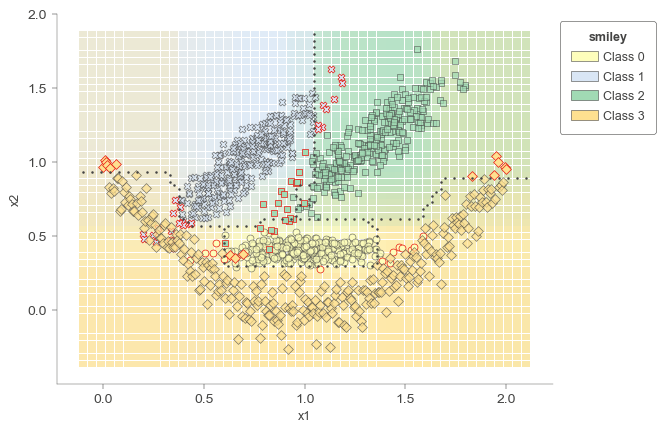

In [9]:
df = smiley(n=300)
X = df[['x1','x2']]
y = df['class']
rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=30, n_jobs=-1)
rf.fit(X.values, y.values)

decision_boundaries(rf, X, y, feature_names=['x1', 'x2'], target_name='smiley',
       markers=['o','X','s','D'])